In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer,RobustScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold
from sklearn.linear_model import LogisticRegression,LassoCV,SGDClassifier
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from tqdm import tqdm
%matplotlib inline
from imblearn.over_sampling import SMOTE
import scipy.stats as stat
import pylab
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import RFECV,RFE
from prettytable import PrettyTable 
from sklearn.preprocessing import FunctionTransformer,PowerTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from mlxtend.classifier import StackingClassifier
from mlxtend.classifier import EnsembleVoteClassifier

In [3]:
data=pd.read_csv("train.csv")
data_test=pd.read_csv("test.csv")

In [4]:
data_1=data.drop(['id','target'],axis=1)
data_1.head(2)

data_test_1=data_test.drop(['id'],axis=1)

In [5]:
x_train = data.drop(['id', 'target'], axis=1)
y_train_1 = data['target']

x_test = data_test.drop(['id'], axis=1)

scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train.shape

(250, 300)

In [6]:
def parameters_models(model,param,X,y):
    best_cv=StratifiedKFold(n_splits=7)
    classifier=GridSearchCV(model,param,cv=best_cv,n_jobs=-1,scoring='roc_auc',return_train_score=True,verbose=1)
    classifier.fit(X,y)
    train_auc=classifier.cv_results_['mean_train_score']
    train_auc_std=classifier.cv_results_['std_train_score']
    cv_auc = classifier.cv_results_['mean_test_score'] 
    cv_auc_std= classifier.cv_results_['std_test_score']

    print("best alpha/parameter",classifier.best_params_)
    
    return classifier

In [7]:
classifier1=SGDClassifier()
classifier2=SGDClassifier()
classifier3=SGDClassifier()
classifier4=LogisticRegression()
classifier5=RandomForestClassifier()
classifier6=DecisionTreeClassifier()
classifier7=XGBClassifier()


In [8]:
param_sgd_hinge={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],'loss':['hinge'],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}


param_sgd_log={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['log'],'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
      'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}



param_sgd_huber={'penalty':['l1','l2','elasticnet'],
       'alpha':[0.0001,0.001,0.1,1,10],
       'loss':['modified_huber'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}],
       'learning_rate' : ['constant', 'optimal', 'invscaling', 'adaptive']}



param_log={'C': [0.001,0.01,0.1,1,10,100],
       'penalty':['l1','elasticnet'],
       'solver':['liblinear','saga'],
       'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
      }


param_rf={'n_estimators':[4,5,6],
         'max_depth':[10,12,13,14,15],
         'min_samples_leaf':[1,2,3,4],
        'min_samples_split':[4,5,6,7],
         'max_features':['sqrt', 'log2'],
         'max_samples':[0.7],
        'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]}

param_dt={'max_depth':[10,12,14,15],
         'min_samples_split':[3,5,7,9],
         'criterion': ['gini', 'entropy'],
         'max_leaf_nodes':[2,3,5,8],
        'class_weight': [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]}


param_xgb={
        'learning_rate':[0.01,0.03,0.05,0.1],
        'n_estimators':[2,5,7,11,15,20],
        'max_depth':[2,3,5],
        'colsample_bytree':[0.1,0.3,0.5],
        'subsample':[0.1,0.3,0.5]}

In [9]:
classifier_hinge=parameters_models(classifier1,param_sgd_hinge,x_train,y_train_1)
classifier_log=parameters_models(classifier2,param_sgd_log,x_train,y_train_1)
classifier_huber=parameters_models(classifier3,param_sgd_huber,x_train,y_train_1)
classifier_log_reg=parameters_models(classifier4,param_log,x_train,y_train_1)
classifier_rf=parameters_models(classifier5,param_rf,x_train,y_train_1)
classifier_dt=parameters_models(classifier6,param_dt,x_train,y_train_1)
classifier_xgb=parameters_models(classifier7,param_xgb,x_train,y_train_1)

Fitting 7 folds for each of 60 candidates, totalling 420 fits
best alpha/parameter {'alpha': 0.0001, 'learning_rate': 'optimal', 'loss': 'hinge', 'penalty': 'l1'}
Fitting 7 folds for each of 240 candidates, totalling 1680 fits
best alpha/parameter {'alpha': 0.1, 'class_weight': {1: 0.5, 0: 0.5}, 'learning_rate': 'optimal', 'loss': 'log', 'penalty': 'elasticnet'}
Fitting 7 folds for each of 240 candidates, totalling 1680 fits
best alpha/parameter {'alpha': 0.1, 'class_weight': {1: 0.5, 0: 0.5}, 'learning_rate': 'optimal', 'loss': 'modified_huber', 'penalty': 'elasticnet'}
Fitting 7 folds for each of 96 candidates, totalling 672 fits
best alpha/parameter {'C': 10, 'class_weight': {1: 0.4, 0: 0.6}, 'penalty': 'l1', 'solver': 'saga'}
Fitting 7 folds for each of 1920 candidates, totalling 13440 fits
best alpha/parameter {'class_weight': {1: 0.5, 0: 0.5}, 'max_depth': 14, 'max_features': 'sqrt', 'max_samples': 0.7, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 6}
Fitting 7 f

In [10]:
classifier5=SGDClassifier(alpha=classifier_hinge.best_params_['alpha'],
                        penalty=classifier_hinge.best_params_['penalty'],
                        loss=classifier_hinge.best_params_['loss'],
                       learning_rate=classifier_hinge.best_params_['learning_rate'])
classifier5.fit(x_train,y_train_1)

classifier6=SGDClassifier(alpha=classifier_log.best_params_['alpha'],
                        penalty=classifier_log.best_params_['penalty'],
                        loss=classifier_log.best_params_['loss'],
                       class_weight=classifier_log.best_params_['class_weight'],
                       learning_rate=classifier_log.best_params_['learning_rate'])
classifier6.fit(x_train,y_train_1)

classifier7=SGDClassifier(alpha=classifier_huber.best_params_['alpha'],
                        penalty=classifier_huber.best_params_['penalty'],
                        loss=classifier_huber.best_params_['loss'],
                       class_weight=classifier_huber.best_params_['class_weight'],
                       learning_rate=classifier_huber.best_params_['learning_rate'])
classifier7.fit(x_train,y_train_1)

classifier8=LogisticRegression(C=classifier_log_reg.best_params_['C'],
                   solver=classifier_log_reg.best_params_['solver'],
                penalty=classifier_log_reg.best_params_['penalty'])

classifier8.fit(x_train,y_train_1)


classifier8=LogisticRegression(C=classifier_log_reg.best_params_['C'],
                   solver=classifier_log_reg.best_params_['solver'],
                penalty=classifier_log_reg.best_params_['penalty'])

classifier8.fit(x_train,y_train_1)




classifier9=RandomForestClassifier(class_weight=classifier_rf.best_params_['class_weight'], 
                                    max_depth=classifier_rf.best_params_['max_depth'],
                                    min_samples_leaf=classifier_rf.best_params_['min_samples_leaf'],
                       min_samples_split=classifier_rf.best_params_['min_samples_split'], 
                                    n_estimators=classifier_rf.best_params_['n_estimators'],
                       max_features=classifier_rf.best_params_['max_features'],
                                    max_samples=classifier_rf.best_params_['max_samples'])

classifier9.fit(x_train,y_train_1)


classifier10=DecisionTreeClassifier(max_depth=classifier_dt.best_params_['max_depth'],
                                    max_leaf_nodes=classifier_dt.best_params_['max_leaf_nodes'],
                                    min_samples_split=classifier_dt.best_params_['min_samples_split'],
                                    criterion=classifier_dt.best_params_['criterion'],
                                   class_weight=classifier_dt.best_params_['class_weight'])

classifier10.fit(x_train,y_train_1)



classifier11=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=classifier_xgb.best_params_['colsample_bytree'],
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=classifier_xgb.best_params_['learning_rate'], max_delta_step=0, max_depth=classifier_xgb.best_params_['max_depth'],
              min_child_weight=1, monotone_constraints='()',
              n_estimators=classifier_xgb.best_params_['n_estimators'], n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=classifier_xgb.best_params_['subsample'], tree_method='exact', validate_parameters=1,
              verbosity=None)

classifier11.fit(x_train,y_train_1)


[08:19:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=20, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [11]:
# calibration
classifier5_hinge=CalibratedClassifierCV(cv=3)
classifier6_logloss=CalibratedClassifierCV(cv=3)
classifier7_huber=CalibratedClassifierCV(cv=3)
classifier9_rf=CalibratedClassifierCV(cv=3)
classifier10_dt=CalibratedClassifierCV(cv=3)
classifier11_xgb=CalibratedClassifierCV(cv=3)

## MLxtend Stacking classifier

In [11]:
stacking_classifier=StackingClassifier(classifiers=[classifier5,classifier6,classifier7,classifier8],
                                       meta_classifier=classifier6,
                                      use_probas=True)


In [12]:
sclf=stacking_classifier.fit(x_train,y_train_1)
predictions=sclf.predict_proba(x_test)[:,1]

In [13]:
submit5=pd.read_csv("sample_submission.csv")
submit5['target']=predictions

x5=submit5.to_csv("stacking.csv",index=False)

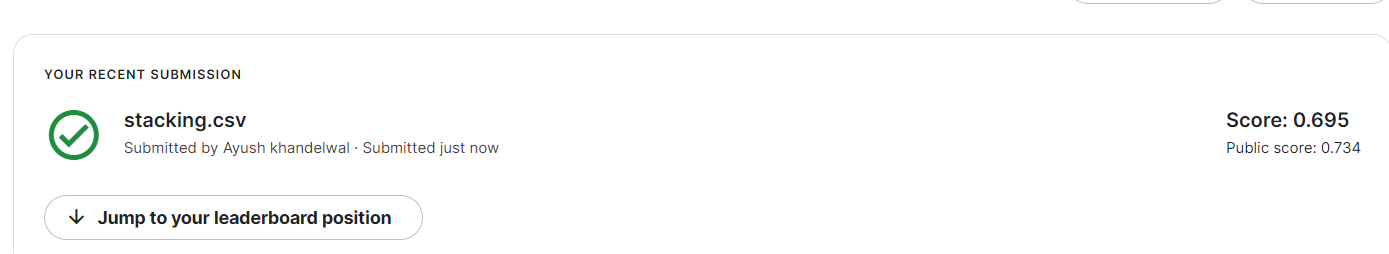

## MLxtend Voting Classifier

In [14]:
eclf = EnsembleVoteClassifier(clfs=[classifier5,classifier6,classifier7,classifier8], weights=[1,1,1,1])
eclf.fit(x_train,y_train_1)


EnsembleVoteClassifier(clfs=[CalibratedClassifierCV(cv=3),
                             CalibratedClassifierCV(cv=3),
                             CalibratedClassifierCV(cv=3),
                             LogisticRegression(C=1, penalty='l1',
                                                solver='saga')],
                       weights=[1, 1, 1, 1])

In [15]:
pred=eclf.predict_proba(x_test)[:,1]

In [16]:
submit5=pd.read_csv("sample_submission.csv")
submit5['target']=pred

x5=submit5.to_csv("voting.csv",index=False)

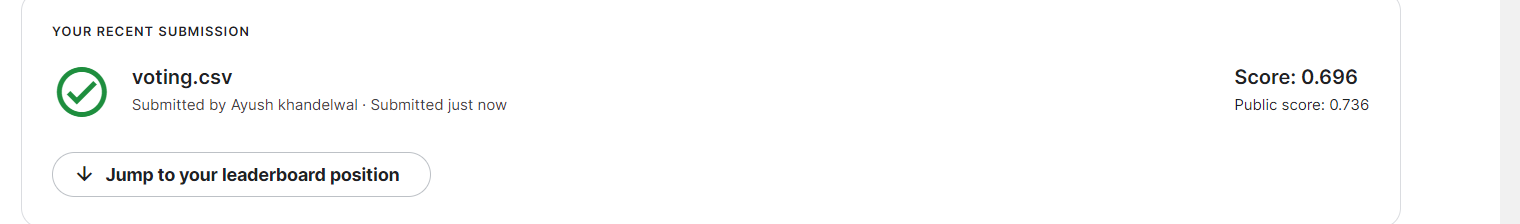

In [22]:
eclf = EnsembleVoteClassifier(clfs=[classifier5,classifier6,classifier7,classifier8], weights=[0.5,1,0.5,1])
eclf.fit(x_train,y_train_1)

pred=eclf.predict_proba(x_test)[:,1]

In [18]:
submit5=pd.read_csv("sample_submission.csv")
submit5['target']=pred

x5=submit5.to_csv("voting1.csv",index=False)

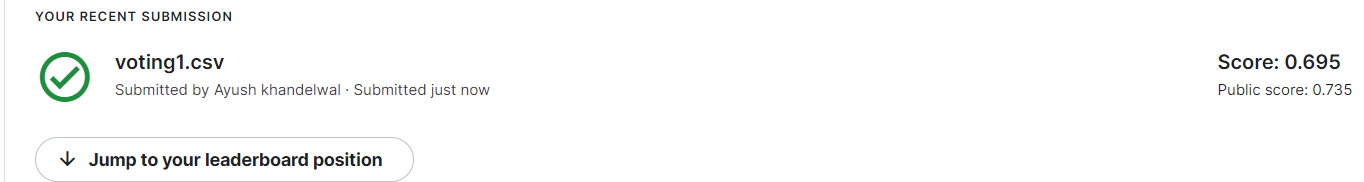

## Sklearn voting classfier

Hard voting is not giving good results

In [15]:
estimators=[('hinge', classifier5_hinge), ('log_loss', classifier6_logloss), ('huber', classifier7_huber),('log_reg',classifier8)]
voting_classfier=VotingClassifier(estimators=estimators,voting="soft",verbose=True)

In [16]:
voting_classfier.fit(x_train,y_train_1)

[Voting] .................... (1 of 4) Processing hinge, total=   0.0s
[Voting] ................. (2 of 4) Processing log_loss, total=   0.0s
[Voting] .................... (3 of 4) Processing huber, total=   0.0s
[Voting] .................. (4 of 4) Processing log_reg, total=   0.1s


VotingClassifier(estimators=[('hinge', CalibratedClassifierCV(cv=3)),
                             ('log_loss', CalibratedClassifierCV(cv=3)),
                             ('huber', CalibratedClassifierCV(cv=3)),
                             ('log_reg',
                              LogisticRegression(C=10, penalty='l1',
                                                 solver='saga'))],
                 verbose=True, voting='soft')

In [17]:
pred=voting_classfier.predict_proba(x_test)[:,1]
print(pred)

[0.56766858 0.42512284 0.70825559 ... 0.70285727 0.87488688 0.49009836]


In [18]:
submit5=pd.read_csv("sample_submission.csv")
submit5['target']=pred

x5=submit5.to_csv("votingsoft_robust.csv",index=False)

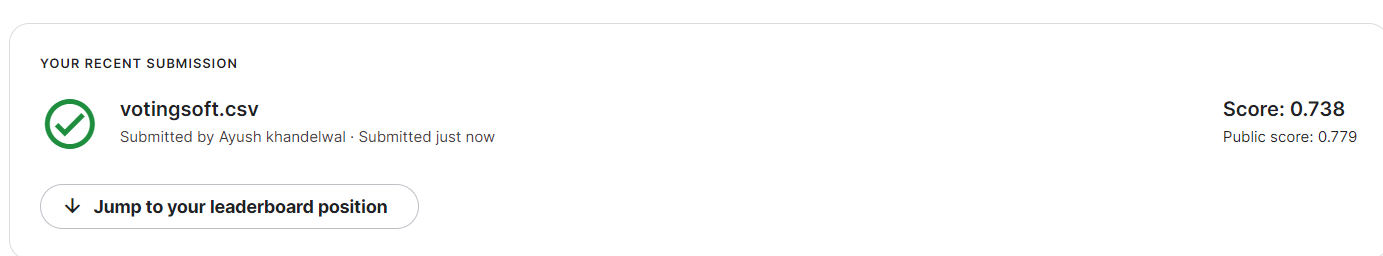

In [22]:
estimators=[('hinge', classifier5_hinge), ('log_loss', classifier6_logloss), ('huber', classifier7_huber),('log_reg',classifier8)]
voting_classfier1=VotingClassifier1(estimators=estimators,voting="soft",verbose=True,weights=[0.2,1,0.3,1])

NameError: name 'VotingClassifier1' is not defined

In [23]:
voting_classfier1.fit(x_train,y_train_1)

[Voting] .................... (1 of 4) Processing hinge, total=   0.0s
[Voting] ................. (2 of 4) Processing log_loss, total=   0.0s
[Voting] .................... (3 of 4) Processing huber, total=   0.0s
[Voting] .................. (4 of 4) Processing log_reg, total=   0.1s


VotingClassifier(estimators=[('hinge', CalibratedClassifierCV(cv=3)),
                             ('log_loss', CalibratedClassifierCV(cv=3)),
                             ('huber', CalibratedClassifierCV(cv=3)),
                             ('log_reg',
                              LogisticRegression(C=10, penalty='l1',
                                                 solver='saga'))],
                 verbose=True, voting='soft', weights=[0.1, 1, 0.1, 1])

In [24]:
pred=voting_classfier1.predict_proba(x_test)[:,1]
print(pred)

[0.46857021 0.32288706 0.73406408 ... 0.74464941 0.90889491 0.41319853]


In [25]:
submit5=pd.read_csv("sample_submission.csv")
submit5['target']=pred

x5=submit5.to_csv("votingsoft1_robuts.csv",index=False)

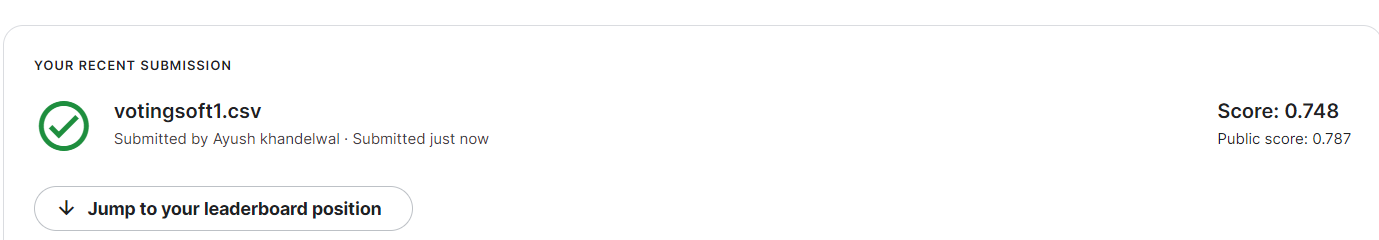

In [12]:
estimators=[('hinge', classifier5_hinge), ('log_loss', classifier6_logloss), ('huber', classifier7_huber),('log_reg',classifier8)]
voting_classfier1=VotingClassifier(estimators=estimators,voting="soft",verbose=True,weights=[0.1,1,0.1,1])
voting_classfier1.fit(x_train,y_train_1)

[Voting] .................... (1 of 4) Processing hinge, total=   0.0s
[Voting] ................. (2 of 4) Processing log_loss, total=   0.0s
[Voting] .................... (3 of 4) Processing huber, total=   0.0s
[Voting] .................. (4 of 4) Processing log_reg, total=   0.1s


VotingClassifier(estimators=[('hinge', CalibratedClassifierCV(cv=3)),
                             ('log_loss', CalibratedClassifierCV(cv=3)),
                             ('huber', CalibratedClassifierCV(cv=3)),
                             ('log_reg',
                              LogisticRegression(C=10, penalty='l1',
                                                 solver='saga'))],
                 verbose=True, voting='soft', weights=[0.1, 1, 0.1, 1])

In [13]:
pred=voting_classfier1.predict_proba(x_test)[:,1]
print(pred)

[0.47188591 0.32086783 0.6981434  ... 0.74497209 0.90883949 0.43229005]


In [14]:
submit5=pd.read_csv("sample_submission.csv")
submit5['target']=pred

x5=submit5.to_csv("votingsoft2_robust.csv",index=False)

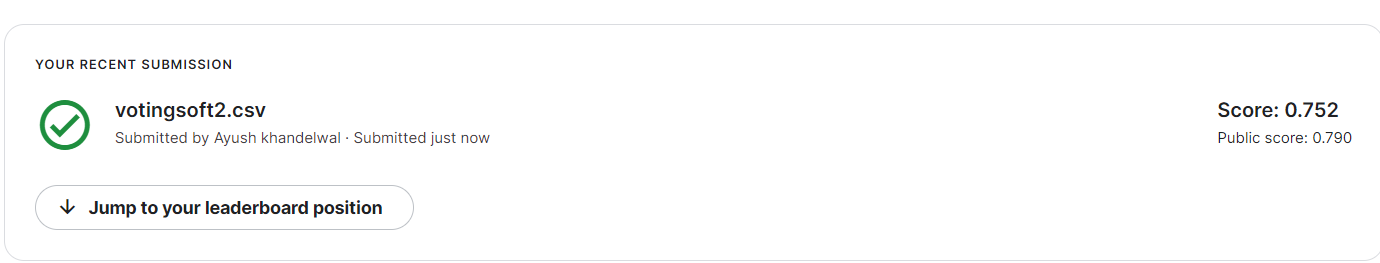

In [11]:
estimators=[('hinge', classifier5_hinge), ('log_loss', classifier6_logloss),('log_reg',classifier8),
           ('rf',classifier_rf),('dt',classifier_dt),('xgb',classifier11_xgb)]
voting_classfier2=VotingClassifier(estimators=estimators,voting="soft",verbose=True)
voting_classfier2.fit(x_train,y_train_1)

[Voting] .................... (1 of 6) Processing hinge, total=   0.0s
[Voting] ................. (2 of 6) Processing log_loss, total=   0.0s
[Voting] .................. (3 of 6) Processing log_reg, total=   0.1s
Fitting 7 folds for each of 1920 candidates, totalling 13440 fits
[Voting] ....................... (4 of 6) Processing rf, total=  37.3s
Fitting 7 folds for each of 512 candidates, totalling 3584 fits
[Voting] ....................... (5 of 6) Processing dt, total=  15.7s
[Voting] ...................... (6 of 6) Processing xgb, total=   0.0s


VotingClassifier(estimators=[('hinge', CalibratedClassifierCV(cv=3)),
                             ('log_loss', CalibratedClassifierCV(cv=3)),
                             ('log_reg',
                              LogisticRegression(C=1, penalty='l1',
                                                 solver='saga')),
                             ('rf',
                              GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
                                           estimator=RandomForestClassifier(),
                                           n_jobs=-1,
                                           param_grid={'class_weight': [{0: 0.5,
                                                                         1: 0.5},
                                                                        {0: 0.6,
                                                                         1...
                                           estimator=DecisionTreeClassifier(),
   

In [12]:
pred=voting_classfier2.predict_proba(x_test)[:,1]
print(pred)

[0.71061392 0.63672385 0.65261742 ... 0.55657072 0.86709666 0.6781661 ]


In [13]:
submit5=pd.read_csv("sample_submission.csv")
submit5['target']=pred

x5=submit5.to_csv("sklearnvotingfull1.csv",index=False)

## Sklearn stacking

In [26]:
from sklearn.ensemble import StackingClassifier

In [27]:
estimators=[('hinge', classifier5_hinge), ('log_loss', classifier6_logloss), ('huber', classifier7_huber),('log_reg',classifier8)]
stacking_classifier=StackingClassifier(estimators=estimators,final_estimator=classifier6,cv=5,verbose=True,
                                       stack_method='predict_proba')
stacking_classifier.fit(x_train,y_train_1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


StackingClassifier(cv=5,
                   estimators=[('hinge', CalibratedClassifierCV(cv=3)),
                               ('log_loss', CalibratedClassifierCV(cv=3)),
                               ('huber', CalibratedClassifierCV(cv=3)),
                               ('log_reg',
                                LogisticRegression(C=10, penalty='l1',
                                                   solver='saga'))],
                   final_estimator=SGDClassifier(alpha=0.1,
                                                 class_weight={0: 0.5, 1: 0.5},
                                                 loss='log',
                                                 penalty='elasticnet'),
                   stack_method='predict_proba', verbose=True)

In [28]:
preds=stacking_classifier.predict_proba(x_test)[:,1]
print(preds)

[0.62570334 0.61137649 0.64989125 ... 0.65305167 0.65980996 0.61784746]


In [29]:
submit5=pd.read_csv("sample_submission.csv")
submit5['target']=preds

x5=submit5.to_csv("sklearnstacking_robust.csv",index=False)

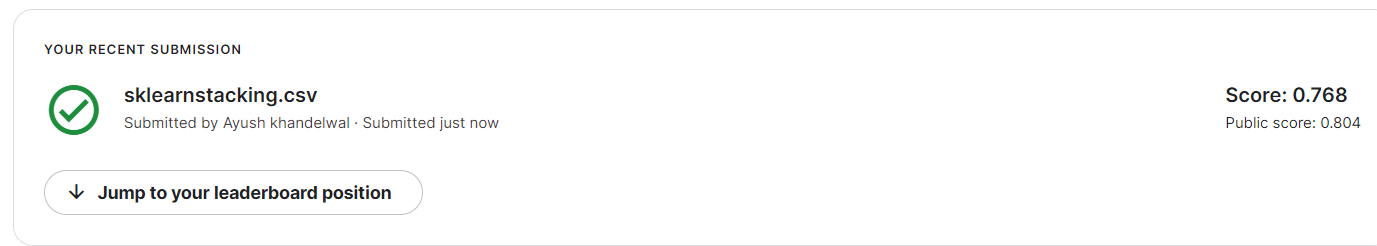

In [43]:
estimators=[('hinge', classifier5), ('log_loss', classifier6), ('huber', classifier7),('log_reg',classifier8)]
stacking_classifier1=StackingClassifier(estimators=estimators,final_estimator=classifier8,cv=5,verbose=True,
                                       stack_method='predict_proba')
stacking_classifier1.fit(x_train,y_train_1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished


StackingClassifier(cv=5,
                   estimators=[('hinge', CalibratedClassifierCV(cv=3)),
                               ('log_loss', CalibratedClassifierCV(cv=3)),
                               ('huber', CalibratedClassifierCV(cv=3)),
                               ('log_reg',
                                LogisticRegression(C=1, penalty='l1',
                                                   solver='saga'))],
                   final_estimator=LogisticRegression(C=1, penalty='l1',
                                                      solver='saga'),
                   stack_method='predict_proba', verbose=True)

In [44]:
preds=stacking_classifier1.predict_proba(x_test)[:,1]
print(preds)

[0.68055768 0.42781731 0.7822269  ... 0.53144172 0.84847877 0.47806053]


In [39]:
submit5=pd.read_csv("sample_submission.csv")
submit5['target']=preds

x5=submit5.to_csv("sklearnstacking1.csv",index=False)

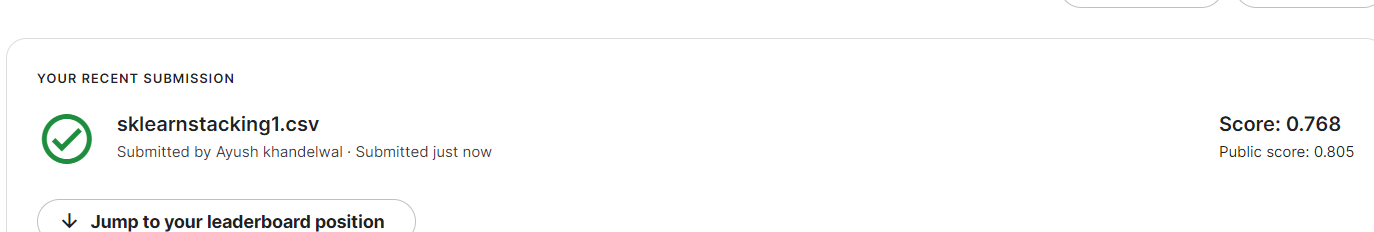

In [40]:
from sklearn.ensemble import StackingClassifier

In [30]:
estimators1=[('hinge', classifier5_hinge), ('log_loss', classifier6_logloss),('log_reg',classifier8),
           ('rf',classifier_rf),('dt',classifier_dt),('xgb',classifier11_xgb)]


In [31]:
stacking_classifier=StackingClassifier(estimators=estimators1,final_estimator=classifier8,cv=5,verbose=True,
                                       stack_method='predict_proba')
stacking_classifier.fit(x_train,y_train_1)

Fitting 7 folds for each of 1920 candidates, totalling 13440 fits
Fitting 7 folds for each of 512 candidates, totalling 3584 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 7 folds for each of 1920 candidates, totalling 13440 fits
Fitting 7 folds for each of 1920 candidates, totalling 13440 fits
Fitting 7 folds for each of 1920 candidates, totalling 13440 fits
Fitting 7 folds for each of 1920 candidates, totalling 13440 fits
Fitting 7 folds for each of 1920 candidates, totalling 13440 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 7 folds for each of 512 candidates, totalling 3584 fits
Fitting 7 folds for each of 512 candidates, totalling 3584 fits
Fitting 7 folds for each of 512 candidates, totalling 3584 fits
Fitting 7 folds for each of 512 candidates, totalling 3584 fits
Fitting 7 folds for each of 512 candidates, totalling 3584 fits


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


StackingClassifier(cv=5,
                   estimators=[('hinge', CalibratedClassifierCV(cv=3)),
                               ('log_loss', CalibratedClassifierCV(cv=3)),
                               ('log_reg',
                                LogisticRegression(C=10, penalty='l1',
                                                   solver='saga')),
                               ('rf',
                                GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
                                             estimator=RandomForestClassifier(),
                                             n_jobs=-1,
                                             param_grid={'class_weight': [{0: 0.5,
                                                                           1: 0.5},...
                                                                           1: 0.4},
                                                                          {0: 0.4,
                       

In [32]:
preds=stacking_classifier.predict_proba(x_test)[:,1]
print(preds)

[0.53445293 0.41599612 0.76426511 ... 0.69639744 0.86406099 0.48645307]


In [33]:
submit5=pd.read_csv("sample_submission.csv")
submit5['target']=preds

x5=submit5.to_csv("sklearnstacking1_robust.csv",index=False)

In [34]:
def box_cox_transformation1(train_dataframe,original_test):
    power_transformer=PowerTransformer(method='yeo-johnson')
    final_dataframe_train_box=power_transformer.fit_transform(train_dataframe)
    final_dataframe_original_test_box=power_transformer.transform(original_test)
    
    return final_dataframe_train_box,final_dataframe_original_test_box

In [35]:
original_boxcox_train,original_boxcox_test=box_cox_transformation1(x_train,x_test)

voting

In [36]:
estimators=[('hinge', classifier5_hinge), ('log_loss', classifier6_logloss), ('huber', classifier7_huber),('log_reg',classifier8)]
voting_classfier4=VotingClassifier(estimators=estimators,voting="soft",verbose=True,weights=[0.1,1,0.1,1])
voting_classfier4.fit(original_boxcox_train,y_train_1)

[Voting] .................... (1 of 4) Processing hinge, total=   0.0s
[Voting] ................. (2 of 4) Processing log_loss, total=   0.0s
[Voting] .................... (3 of 4) Processing huber, total=   0.0s
[Voting] .................. (4 of 4) Processing log_reg, total=   0.1s


VotingClassifier(estimators=[('hinge', CalibratedClassifierCV(cv=3)),
                             ('log_loss', CalibratedClassifierCV(cv=3)),
                             ('huber', CalibratedClassifierCV(cv=3)),
                             ('log_reg',
                              LogisticRegression(C=10, penalty='l1',
                                                 solver='saga'))],
                 verbose=True, voting='soft', weights=[0.1, 1, 0.1, 1])

In [37]:
pred=voting_classfier4.predict_proba(x_test)[:,1]
print(pred)

[0.55471311 0.41546396 0.76363339 ... 0.76830007 0.89120465 0.47013449]


In [38]:
submit5=pd.read_csv("sample_submission.csv")
submit5['target']=pred

x5=submit5.to_csv("boxcox_4_voting_robust.csv",index=False)

In [57]:
estimators=[('hinge', classifier5_hinge), ('log_loss', classifier6_logloss),('log_reg',classifier8),
           ('rf',classifier_rf),('dt',classifier_dt),('xgb',classifier11_xgb)]
voting_classfier5=VotingClassifier(estimators=estimators,voting="soft",verbose=True)
voting_classfier5.fit(x_train,y_train_1)

[Voting] .................... (1 of 6) Processing hinge, total=   0.0s
[Voting] ................. (2 of 6) Processing log_loss, total=   0.0s
[Voting] .................. (3 of 6) Processing log_reg, total=   0.1s
Fitting 7 folds for each of 1920 candidates, totalling 13440 fits
[Voting] ....................... (4 of 6) Processing rf, total=  37.4s
Fitting 7 folds for each of 512 candidates, totalling 3584 fits
[Voting] ....................... (5 of 6) Processing dt, total=  15.3s
[Voting] ...................... (6 of 6) Processing xgb, total=   0.0s


VotingClassifier(estimators=[('hinge', CalibratedClassifierCV(cv=3)),
                             ('log_loss', CalibratedClassifierCV(cv=3)),
                             ('log_reg',
                              LogisticRegression(C=1, penalty='l1',
                                                 solver='saga')),
                             ('rf',
                              GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=None, shuffle=False),
                                           estimator=RandomForestClassifier(),
                                           n_jobs=-1,
                                           param_grid={'class_weight': [{0: 0.5,
                                                                         1: 0.5},
                                                                        {0: 0.6,
                                                                         1...
                                           estimator=DecisionTreeClassifier(),
   

In [58]:
pred=voting_classfier5.predict_proba(x_test)[:,1]
print(pred)

[0.72565092 0.61632671 0.63898851 ... 0.55573313 0.85040513 0.65157017]


In [59]:
submit5=pd.read_csv("sample_submission.csv")
submit5['target']=pred

x5=submit5.to_csv("boxcox_full_voting.csv",index=False)